# Venice Flooding Prediction System DAIA
This project is designed to predict when Venice will be flooded. Venice is frequently flooded, and this is a problem, having an AI that can predict this could help the tourists and citizens of the city to take the necessary precautions.

By Beatrice Marro

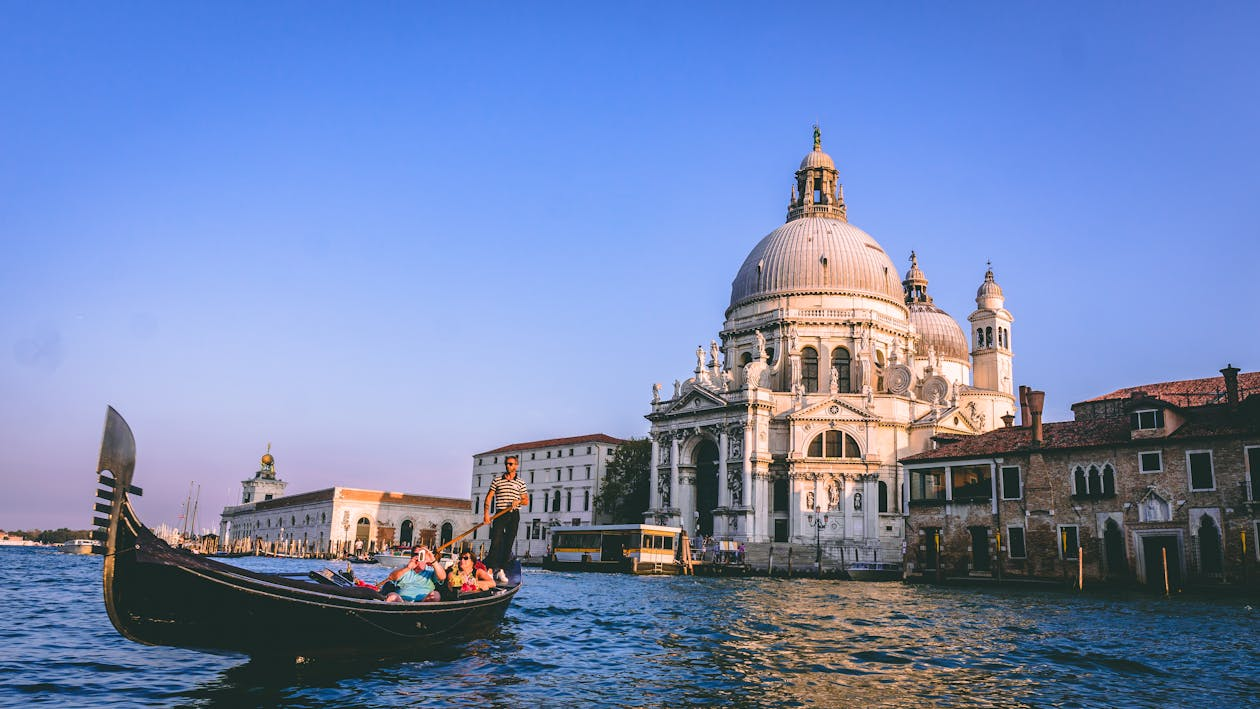

Import Libraries:

In [46]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("numpy version:", np.__version__)

scikit-learn version: 1.3.0
pandas version: 2.0.3
seaborn version: 0.12.2
numpy version: 1.24.3


# Domain Understanding
##### What is acqua alta
When an **astronomical tide** coincides with a strong **south-east wind (“scirocco”)**, **low air pressures** and the **Adriatic’s oscillating currents (“seiche”)**, the water level in Venice rises and lower areas of the city flood. This is acqua alta, which is not to be confused with an actual flood since it is a completely natural and normal occurrence. The water levels gradually rise by no more than a few centimetres and only last for a couple of hours before the tide goes out and the canals return to normal.  

The tide is measured against the mareographic zero of Punta della Salute (“sea level”), which is a reference level that has existed in Venice since 1897. **Acqua alta** is characterised as a **tide exceeding 80 to 110 centimetres above zero on this scale**. When the **tide exceeds 110 centimetres**, only **12% of the city is flooded**, which gives you an idea of how little Venice is affected by high water. 

An **exceptional tide**, on the other hand, is when the **water level measures over 140 centimetres**. Whilst this is a rare occurrence in Venice, it results in over 50% of the historic centre flooding.

Source: https://www.tuscanynowandmore.com/discover-italy/essential-advice/guide-acqua-alta#:~:text=What%20to%20do%20in%20Venice%20when%20in%20floods&text=For%20a%20few%20days%20each,becomes%20one%20with%20the%20lagoon.

The translation of Acqua Alta is High Water.

___
##### Which factors affect tide levels?
The relative distances and positions of the sun, moon and Earth all influence the size and magnitude of the Earth's two tidal bulges.

A tidal bulge is the highest point of water on the Earth as the gravitational force of the Moon attracts the Earth's water, forming tides.

___
##### Are tide levels affected by global warming?
Tide levels are not particularly affected by global warming. This is because tide levels are determined by astrological factors, like the gravitational force of the Moon.

___
##### Which variables are affected by global warming?
- **Sea Level** is influenced by global warming. This is due to various factors, one of these is the melting of the ice caps, which is leading to rising sea levels.
- **Temperature** is influenced by global warming, this is caused by the emission of gases, like Carbone Dioxide, which get trapped in the atmosphere of the Earth, and lead to a variety of temperature changes.
- **Wind Speed** and **Direction** is influenced by global warming. An example of this is when temperatures rise, the wind speed and direction over both land and water changes.
- **Surface Pressure** is also affected by global warming. An example of this is also caused by a rise in temperature, which leads to air expanding, which in turn leads to a fall in surface pressure.

## 💼 Executive Summary
The Executive Summary highlights any key points from domain understanding as well as data analysis observations in this Notebook.
##### Sea Level:
- The years in the range with the highest average yearly sea level are 2010 and 2014. During these years the average sea level was over 110cm (Figure 2).
- The sea level is typically highest in the period from October to January (Figure 3).
- The highest sea level in this range was in November 2019, when there was a major flood in Venice, where the sea level reached a maximum of 140.9cm (Figure 1 and 2).
- The sea level seems to have weak positive correlation from December to May with the temperature, and weak negative correlation ranging from June to November. From my domain understanding, I know that the sea level is particularly high in the months of November and December, however this does not seem to be shown in my confusion matrix (Figure 10).

##### Tide Level:
- The tide level has a strong direct relationship with the sea level.
- The sea level and tide levels have very similar values, this makes sense as a stronger tide will result in a higher sea level (Figure 6).

##### Temperature:
- The temperature is mostly higher in 2022 compared to 2001, particularly during the summer months.
- The temperature has a weak correlation with the year, but a stronger and visible correlation with the month of the year (Figure 8).
- The temperature has a strong positive correlation in the summer months, whereas it has a strong negative correlation in the winter months, this makes sense, as in the summer, the temperature is much warmer than in the winter (Figure 9).
- The sea level has a weak (negative or positive) correlation with the month and year (Figure 10).

##### Wind Speed:
- The monthly wind speed change really varies between 2001 and 2022, during the summer months the values are very similar, however they vary during the winter months.
- The wind speed has a weak, yet positive correlation with the sea level (Figure 7).
- The average wind speed really varies throughout the years. This was particularly high in 2003 and 2010, whereas it was particularly low in 2008 and 2018. This is quite unusual, as in 2011 and 2019 there were some major floods in Venice, however, in 2010 the wind speed was very high, and in 2018 it was really low (Figure 15).

##### Wind Direction
- A high sea level (potentially a flood) is caused when a strong tide concides with a strong south-east wind ("scirocco").
- This occurs when the Wind Direction is in the roughly in the range of 125 to 145 degrees.
- On a yearly basis the wind direction tends to vary a lot without an visibile pattern, it also consists of some outliers (Figure 16 and 17).
- On a monthly basis, flooding can occur when the average montly wind direction is the range 125-145 degrees.

##### Surface Pressure:
- The surface pressure is very variable throughout the period of 2001 to 2022. There was a significant surge in 2011, this was also the year of a major flood. However, in 2019 there is just a minor surge, while there still was a quite significant flood during that year (Figure 17).

# 🔍 Data sourcing
I have found the data for the sea level per month from **2001 to 2022** from **Permanent Service for Mean Sea Level (PSMSL)**, this is obtained from the Venezia II station.
I have obtained the data for the historic temperature and wind pressure data from the **NASA POWER Data Access Viewer**, I selected Venice and extracted the data from the same range as the other Dataset.

- PSML - Permanent Service for Mean Sea Level → Link for Venezia II Station (Sea Level): https://psmsl.org/data/obtaining/stations/2100.php
- NASA POWER Data Access Viewer (Temperature, Surface Pressure, Wind Speed and Direction): https://power.larc.nasa.gov/data-access-viewer/
- ISPRA - Istituto Superiore per la Protezione e Ricerca Ambientale (Tide Level):
https://www.venezia.isprambiente.it/index.php?folder_id=20&stazione_id=129&tipo_dati_id=1&view=year

### Ethical and Legal Data
I have taken care to check that all of my Datasets are legal to use for an individual project, below I have included links for this:
- Sea Level data from PMSL:
> Our data, products, archives, documentation and training information are **free for all to use**.

Link: https://psmsl.org/about_us/support_us.php

- Temperature, Surface Pressure, Wind Speed and Direction from NASA Power Data Access Viewer:
> There are **no restrictions on the use, access, and/or download of data from the NASA POWER Project**. We request that you **cite the NASA POWER Project** when using the data provided from NASA POWER Project.

Link: https://registry.opendata.aws/nasa-power/

- Tide Level data from ISPRA (Translated to English):
> IODL 2.0 provides that the user can freely:<br><br>
| 1. consult, extract, download, copy, publish, distribute and transmit information;<br><br>
| 2. create a derivative work, for example by combining it with other information (so-called mashup), including it in a product or developing an IT application that uses it as a database.<br><br>
| 3. In exchange, the user is only asked to **indicate the source of the information and the name of the person providing the data, including, if possible, a link to the license**.<br><br>
| 4. Compared to IODL 1.0, the Italian Open Data License 2.0 does not provide for the user's obligation to publish and share any derivative works (for example, applications) with the same license or with another open license, deemed compatible.

Link: https://www.dati.gov.it/iodl/2.0/

# 📦 Data provisioning
## Data requirements
The goal of my project is to predict the water levels of Venice in the future, this will be used to predict when there will be floodings.

My data needs to have the sea levels per month for a relatively long period of time, it would also be useful for the model to have other data related to a certain period of time, such a temperature and wind speeds, as this would be helpful for the model to identify trends in the data.
### Required data elements

Below I have concluded the useful data items to have:
- Year
- Month
- Sea Level (cm)
- Tide Level (cm)
- Temperature (°C)
- Wind Speed (km/h)
- Wind Direction (°)
- Surface Pressure (kPa)

I will investigate whether these features have a direct or inverse relationship with the sea level, as this will determine whether they could be useful features to include in the time series model.

#### Sea Level Tide Gauge Data
This is a picture of a tide gauge collection point in Venice.

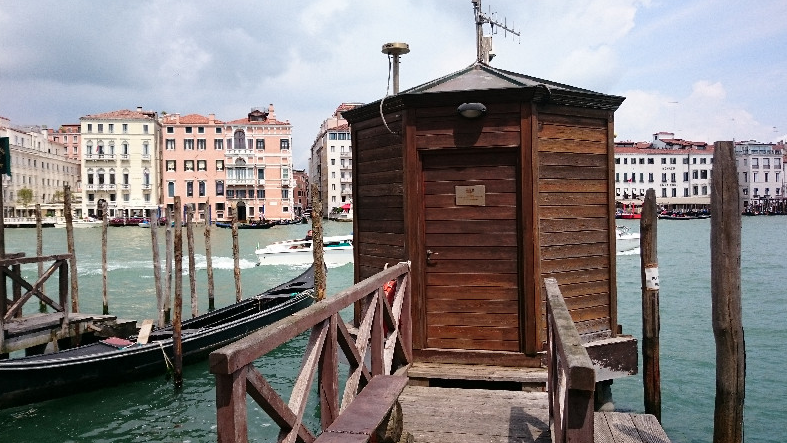

In [47]:
# Sea level is measured in mm
columns = ["Year", "Month", "Sea Level (mm)"]

df = pd.read_csv("Full Sea Monthly Data Venice.csv", names=columns)
df.head()

,Year,Month,Sea Level (mm)
0,2001,3,7029
1,2001,4,6870
2,2001,5,6925
3,2001,6,6880
4,2001,7,6901


In [48]:
df.describe()

,Year,Month,Sea Level (mm)
count,262.000000,262.000000,262.000000
mean,2011.580153,6.538168,6993.595420
std,6.313586,3.443645,105.053482
min,2001.000000,1.000000,6662.000000
25%,2006.000000,4.000000,6932.250000
50%,2012.000000,7.000000,6998.000000
75%,2017.000000,9.750000,7053.500000
max,2022.000000,12.000000,7382.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            262 non-null    int64
 1   Month           262 non-null    int64
 2   Sea Level (mm)  262 non-null    int64
dtypes: int64(3)
memory usage: 6.3 KB


#### Sea Tide Levels
The tide level data is split up into files, in which there is a file for each year, which contains data for each day of every month of every year, where the data is collected at intervals of 30 minutes.

The code below is used to combine the datasets (txt files) from each year from 2001 to 2023 (located in the Tide Data folder).

This data is collected at the **Punta della Salute** station, which is located in the central area of Venice.

In [50]:
import os

all_data = pd.DataFrame()
folder_path = r"C:\Users\User\Documents\GitHub\venice-flooding-prediction-system\Tide Data"
files = os.listdir(folder_path)

for file in files:
    if file.endswith(".txt"):
        file_path = os.path.join(folder_path, file)
        
        temp_data = pd.read_csv(file_path, sep=";", header=None, 
                                names=["DateTime", "Category", "Tide Level (cm)", "Additional Column"])
        
        all_data = pd.concat([all_data, temp_data], ignore_index=True)

all_data["DateTime"] = pd.to_datetime(all_data["DateTime"])

# Sort by DateTime and reset index
df_tide_levels = all_data.sort_values(by="DateTime").reset_index(drop=True)

# Drop unnecessary columns
df_tide_levels = df_tide_levels.drop(columns=["Category", "Additional Column"])

df_tide_levels

,DateTime,Tide Level (cm)
0,2001-01-01 00:00:00,65
1,2001-01-01 00:30:00,72
2,2001-01-01 01:00:00,77
3,2001-01-01 01:30:00,80
4,2001-01-01 02:00:00,84
...,...,...
1222962,2023-12-31 23:35:00,64
1222963,2023-12-31 23:40:00,65
1222964,2023-12-31 23:45:00,66
1222965,2023-12-31 23:50:00,67


In [51]:
import datetime

df_tide_levels["DateTime"] = pd.to_datetime(df_tide_levels["DateTime"])

tide_level_averages = []

for year in range(2001, 2024):
    for month in range(1, 13):
        dates = df_tide_levels[(df_tide_levels["DateTime"].dt.year == year) & 
                               (df_tide_levels["DateTime"].dt.month == month)]
        
        date = datetime.datetime(year, month, 1)
        
        if not dates.empty:
            average_tide_level = dates["Tide Level (cm)"].mean()
            tide_level_averages.append([date, average_tide_level])
        else:
            tide_level_averages.append([date, pd.NA])
                
df_tide_level_averages = pd.DataFrame(tide_level_averages, columns=["Date", "Tide Level (cm)"])
df_tide_level_averages

,Date,Tide Level (cm)
0,2001-01-01,40.422500
1,2001-02-01,26.357093
2,2001-03-01,41.762829
3,2001-04-01,24.606061
4,2001-05-01,29.250312
...,...,...
271,2023-08-01,39.945565
272,2023-09-01,37.913079
273,2023-10-01,46.914875
274,2023-11-01,52.736921


In [52]:
# Export as CSV
df_tide_level_averages.to_csv("combined_tide_data.csv", index=False)

## Wind and Pressure

##### Dataset Information:
- **Dataset**: NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual
- **Dates (month/day/year)**: 01/01/2001 through 12/31/2022
- **Location**: Latitude 45.4408, Longitude 12.3155
- **Elevation from MERRA-2**: Average for 0.5 x 0.625 degree lat/lon region = 8.66 meters
- **Missing Data Value**: -999 (for data that cannot be computed or is outside of the sources availability range)

**Parameters:**
- PS: MERRA-2 Surface Pressure (kPa)
- WD2M: MERRA-2 Wind Direction at 2 Meters (Degrees)
- WS2M: MERRA-2 Wind Speed at 2 Meters (m/s)
- WD10M: MERRA-2 Wind Direction at 10 Meters (Degrees)
- WS10M: MERRA-2 Wind Speed at 10 Meters (m/s)
- WS2M_MAX: MERRA-2 Wind Speed at 2 Meters Maximum (m/s)
- WS2M_MIN: MERRA-2 Wind Speed at 2 Meters Minimum (m/s)
- WS10M_MAX: MERRA-2 Wind Speed at 10 Meters Maximum (m/s)
- WS10M_MIN: MERRA-2 Wind Speed at 10 Meters Minimum (m/s)
- WS2M_RANGE: MERRA-2 Wind Speed at 2 Meters Range (m/s)
- WS10M_RANGE: MERRA-2 Wind Speed at 10 Meters Range (m/s)

In [53]:
df_wind_pressure = pd.read_csv("POWER_Point_Monthly_Timeseries_2001_2022_Wind_Pressure.csv")
df_wind_pressure.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PS,2001,101.60,101.72,100.80,101.11,101.36,101.34,101.25,101.37,101.15,101.97,101.80,102.01,101.46
1,PS,2002,102.64,101.69,101.65,101.26,101.28,101.42,101.17,101.14,101.39,101.37,101.11,101.65,101.48
2,PS,2003,101.38,102.05,102.18,101.50,101.59,101.35,101.30,101.36,101.83,101.23,101.86,101.89,101.62
3,PS,2004,101.14,101.77,101.95,101.17,101.22,101.43,101.38,101.21,101.76,101.43,101.68,101.82,101.49
4,PS,2005,102.03,101.46,101.55,101.38,101.43,101.53,101.20,101.29,101.63,102.07,101.68,101.55,101.57


## Temperatures and Thermal IR Flux

##### Dataset Information:
- **Dataset**: NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual
- **Dates (month/day/year)**: 01/01/2001 through 12/31/2022
- **Location**: Latitude 45.4408, Longitude 12.3155
- **Elevation from MERRA-2**: Average for 0.5 x 0.625 degree lat/lon region = 8.66 meters
- **Missing Data Value**: -999 (for data that cannot be computed or is outside of the sources availability range)

**Parameters:**
- TS: MERRA-2 Earth Skin Temperature (C)
- T2M: MERRA-2 Temperature at 2 Meters (C)
- T2MDEW: MERRA-2 Dew/Frost Point at 2 Meters (C)
- T2MWET: MERRA-2 Wet Bulb Temperature at 2 Meters (C)
- T2M_MAX: MERRA-2 Temperature at 2 Meters Maximum (C)
- T2M_MIN: MERRA-2 Temperature at 2 Meters Minimum (C)
- T2M_RANGE: MERRA-2 Temperature at 2 Meters Range (C)
- ALLSKY_SFC_LW_DWN: CERES SYN1deg All Sky Surface Longwave Downward Irradiance (W/m^2)

In [54]:
df_temperature = pd.read_csv("POWER_Point_Monthly_Timeseries_2001_2022_Temperatures_Thermal_IR_Flux.csv")
df_temperature.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,TS,2001,7.74,7.15,10.68,12.60,19.26,21.55,25.23,26.63,19.66,17.87,10.96,5.23,15.44
1,TS,2002,3.84,6.57,10.19,12.90,18.15,23.83,24.94,24.17,20.39,16.47,13.04,8.53,15.30
2,TS,2003,5.65,4.29,8.57,11.48,19.47,26.44,27.20,28.62,20.79,15.04,11.45,7.21,15.58
3,TS,2004,4.89,5.07,7.46,12.48,16.37,21.36,24.83,25.66,21.53,17.31,11.70,7.94,14.75
4,TS,2005,5.00,4.26,7.71,12.04,18.08,23.19,25.65,23.62,21.34,15.71,10.80,6.38,14.54


## Surface Pressure

##### Dataset Information:
- **Dataset**: NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual
- **Dates (month/day/year)**: 01/01/2001 through 12/31/2022
- **Location**: Latitude 45.4347, Longitude 12.3341
- **Elevation from MERRA-2**: Average for 0.5 x 0.625 degree lat/lon region = 8.66 meters
- **Missing Data Value**: -999 (for data that cannot be computed or is outside of the sources availability range)

**Parameters:**
- PS: MERRA-2 Surface Pressure (kPa)

In [55]:
df_surface_pressure = pd.read_csv("POWER_Point_Monthly_2001_2022_Surface_Pressure.csv")
df_surface_pressure.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,PS,2001,101.60,101.72,100.80,101.11,101.36,101.34,101.25,101.37,101.15,101.97,101.80,102.01,101.46
1,PS,2002,102.64,101.69,101.65,101.26,101.28,101.42,101.17,101.14,101.39,101.37,101.11,101.65,101.48
2,PS,2003,101.38,102.05,102.18,101.50,101.59,101.35,101.30,101.36,101.83,101.23,101.86,101.89,101.62
3,PS,2004,101.14,101.77,101.95,101.17,101.22,101.43,101.38,101.21,101.76,101.43,101.68,101.82,101.49
4,PS,2005,102.03,101.46,101.55,101.38,101.43,101.53,101.20,101.29,101.63,102.07,101.68,101.55,101.57


### Wind Direction
This data shows the wind direction at the height of 10 meters.

-BEGIN HEADER-															
NASA/POWER CERES/MERRA2 Native Resolution Monthly and Annual 															
Dates (month/day/year): 01/01/2001 through 12/31/2022 															
Location: Latitude  45.4283   Longitude 12.4088 															
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 8.66 meters															
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 															
Parameter(s): 															
WD10M     MERRA-2 Wind Direction at 10 Meters (Degrees) 															
-END HEADER-															

A strong **south-east wind (“scirocco”)** contributes to strong tides, which in turn contribute to high sea levels and flooding.

For a wind to be in the south direction it needs to from roughly 125 to 145 degrees.

In [56]:
df_wind_direction = pd.read_csv("POWER_Point_Monthly_2001_2022_Wind_Direction.csv")
df_wind_direction.head()

,PARAMETER,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANN
0,WD10M,2001,52.75,64.31,127.12,115.31,97.38,116.81,128.44,100.94,121.31,123.19,52.19,58.00,85.44
1,WD10M,2002,68.88,62.00,79.25,78.12,111.50,126.94,104.69,98.94,81.75,108.38,130.75,61.50,89.06
2,WD10M,2003,59.00,67.19,105.88,72.62,96.50,117.25,107.44,119.38,86.44,79.94,66.25,47.19,79.00
3,WD10M,2004,48.81,46.44,67.94,80.19,150.81,92.56,103.38,133.44,90.19,110.94,48.75,54.19,76.25
4,WD10M,2005,30.19,56.75,87.69,107.44,95.81,118.12,102.12,90.75,85.00,67.06,41.94,34.50,72.06


### Data Format Conversion
I am using the function below to convert the data from the format of the NASA Power DAVe to the Prophet format, which also works very well for plotting visualizations.

In [57]:
def convert_nasa_to_prophet_format(df, selected_parameter, variable_name):
    sub_list = []
        
    for index, row in df.iterrows():
        parameter = row["PARAMETER"]
        if parameter == selected_parameter:
            for year in range(2001, 2023):
                if row["YEAR"] == year:
                    for month in months:
                        average_variable_level = row[month]
                        month_number = months.index(month) + 1

                        date = datetime.datetime(year, month_number, 1) # Set day to 1
                        sub_list.append([date, average_variable_level])
        
    return pd.DataFrame(sub_list, columns=["ds", variable_name])

### Moving Average
The moving average is a statistical method of discovering underlying trends in the data. It calculates the average of a section of the data, and then the average of the next, and so on.

Below is the formula for the **Moving Average**:
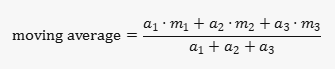

Where `a` are the weights and `m` are the data points, such as the sea level, tide level or temperature.

In [58]:
def calculate_moving_average(weights, data_points):
    total = 0
    
    for weight, data_point in zip(weights, data_points):
        total += weight * data_point
        
    return total / sum(weights)

In [59]:
# Define window size for moving average
window_size = 3

moving_averages = []

df_sea_level_moving_averages = df.copy()

for i in range(len(df)):
    if i < window_size - 1:
        moving_averages.append(df_sea_level_moving_averages["Sea Level (mm)"].iloc[i])
    else:
        window = df_sea_level_moving_averages["Sea Level (mm)"].iloc[i - window_size + 1 : i + 1]
        window_average = calculate_moving_average(weights=[0.2, 0.6, 0.2], data_points=window)  # Adjusting weights
        moving_averages.append(window_average)

df_sea_level_moving_averages["Sea Level (mm)"] = moving_averages
df_sea_level_moving_averages.to_csv("Full Sea Monthly Data Venice Moving Averages.csv", index=False)

I attempted to use the moving average on the sea level data, however it was not successful on my model. A possible reason for this is that I am using the Prophet model which is desiged to use regular data from a natual environment, thus the use of moving averages may have lead to a decrease in the accuracy because of this.

However, I found that in the Prophet model, the use of hyperparameter tuning greatly improved the accuracy. This includes some regularization techniques, which have a similar effect as the moving average would have with other models.

# Data Preparation
#  🧼 Data cleaning
- Remove Tide gauge depth -> To get the water flooding level from the surface.
- Adjust Sea Level from collection point to central area of Venice.
- Convert Sea Level from mm to cm. This is a more common unit of measurement for the sea level.

#### Tide Gauge Depth
"Venezia II is now RLR. Primary benchmark 0170_D02_001 is 4.4729m (displayed as 4.473m on diagram) above national Italian Military Geographic Institute (IGM) altimetric datum."
##### Revised Local Reference (RLR) Diagram for VENEZIA II
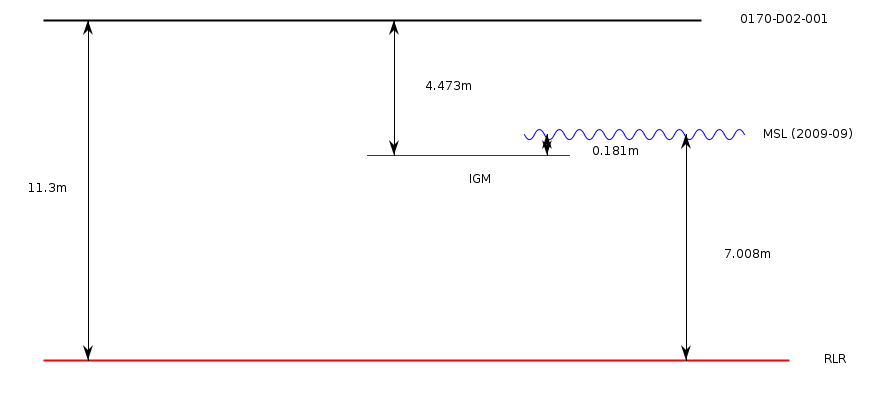

In [60]:
# Deduct 4.473m from the water level
# 4.473 * 1000 = 4473

sea_levels_surface = []

for sea_level_mm in df["Sea Level (mm)"]:
    sea_level_surface = sea_level_mm - 4473
    sea_levels_surface.append(sea_level_surface)
    
df["Sea Level (mm)"] = sea_levels_surface

#### Adjusting sea level to central area of Venice
As seen in the picture below, the station of Venezia II is not exactly within the central area of Venice, it is located near the lighthouse, so relatively a lot nearer to the sea, this means that at the station the sea level are prone to being higher compared to how they would be in a central area of Venice, like Piazza Marconi.

This means that this level needs to be adjusted to be relevant to the central areas of Venice.
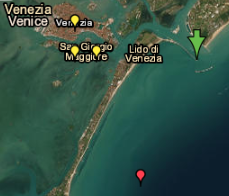
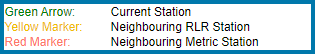

I am using the data from this station as it has the most recently recorded data (from 2001 to 2022).

In [61]:
# 4.473m vs 1.5m below the sea level
# Lido di Venezia: Highest elevation: 3 m (10 ft)
# Venezia (centro): Elevation: 1 m (3 ft)

# Lido di Venezia is 2 meters above the central Venice

sea_levels_surface = []

for sea_level_mm in df["Sea Level (mm)"]:
    sea_level_surface = sea_level_mm - 1500 # 1.5 meters
    sea_levels_surface.append(sea_level_surface)
    
df["Sea Level (mm)"] = sea_levels_surface

#### Convert Sea Level from mm to cm

In [62]:
sea_level_converted = []

for sea_level_mm in df["Sea Level (mm)"]:
    sea_level_cm = sea_level_mm / 10
    sea_level_converted.append(sea_level_cm)
    
df["Sea Level (mm)"] = sea_level_converted 
# Rename column
df.rename(columns={"Sea Level (mm)": "Sea Level (cm)"}, inplace=True)

#### Figure Number

In [63]:
figure_number = 0

def get_figure_number():
    global figure_number
    figure_number += 1
    return figure_number

**Venice Flood Sea Levels Information**:
- When water level is above 110 cm, this will cause a partial flooding (12% of the city).
- A very powerful tide could flood venice at the point where the water level reaches 140cm, in this case the city will be entirely flooded.

## Data Understanding
### Exploratory Data Analysis
This section focuses on identifying interesting information, such as statistics and patterns present in the data which are important for the AI part of this project.


### EDA Questions:
- How did the sea level change over time (year average)?
- How did the temperature change over time?
- How did the tide levels change over time? Do these change in a similar way compared to the sea level?
- How did the the wind speed and direction change over time, and throughout the months of the years?
- How did the surface pressure change over time?
- What are the correlations between all of these variables to the sea level?
- How is the temperature correlated to the year and month, and why?
- What is the change in the standard distribution and quartiles for all of these variables over time?

## Reusable functions for **Box Plots** and **Line Graphs**

In [64]:
# For data to go in the below methods it needs to be in a df with the following format:
# Date, Sea Level (cm)
def generate_yearly_box_plots(dataframe, date_column, target_column, title, is_sea_or_tide_level):
    df_yearly_levels = dataframe.groupby(dataframe[date_column].dt.year)[target_column].median().reset_index()
    df_yearly_levels.columns = ["Year", target_column]

    plt.figure(figsize=(15, 8))
    sns.boxplot(data=dataframe, x=dataframe[date_column].dt.year, y=target_column)
    plt.title(f"Figure {get_figure_number()}: {title}")
    plt.xlabel("Year")
    plt.ylabel(target_column)
    if is_sea_or_tide_level:
        plt.axhline(y=110, color="red", linewidth=1, linestyle="--", label="Partial Flood Threshold (110 cm)")
        plt.axhline(y=140, color="black", linewidth=1, linestyle="--", label="Major Flood Threshold (140 cm)")
        plt.legend()
        
    plt.show()
    
def generate_yearly_line_plot(dataframe, date_column, target_column, title, is_sea_or_tide_level, start_at_0):
    # Calculate yearly median tide levels
    df_yearly_levels = dataframe.groupby(dataframe[date_column].dt.year)[target_column].median().reset_index()
    df_yearly_levels.columns = ["Year", target_column]

    # Plotting the line plot
    plt.figure(figsize=(15, 8))
    sns.lineplot(data=df_yearly_levels, x="Year", y=target_column, marker="o")
    plt.title(f"Figure {get_figure_number()}: {title}")
    plt.xlabel("Year")
    plt.ylabel(target_column)
    
    if is_sea_or_tide_level:
        plt.axhline(y=110, color="red", linewidth=2, linestyle="--", label="Partial Flood Threshold (110 cm)")
        plt.legend()
        
    if start_at_0:
        plt.ylim(ymin=0) # Start y-axis from 0
    plt.grid(True)
    plt.show()

## Change in **Sea Levels** over time

In [65]:
# Convert Month and Year to date in df
sea_levels = []

for month, year, sea_level in zip(df["Month"], df["Year"], df["Sea Level (cm)"]):
    date = datetime.datetime(year, month, 1) # Set day as 1
    sea_levels.append([date, sea_level])
    
df = pd.DataFrame(sea_levels, columns=["Date", "Sea Level (cm)"])

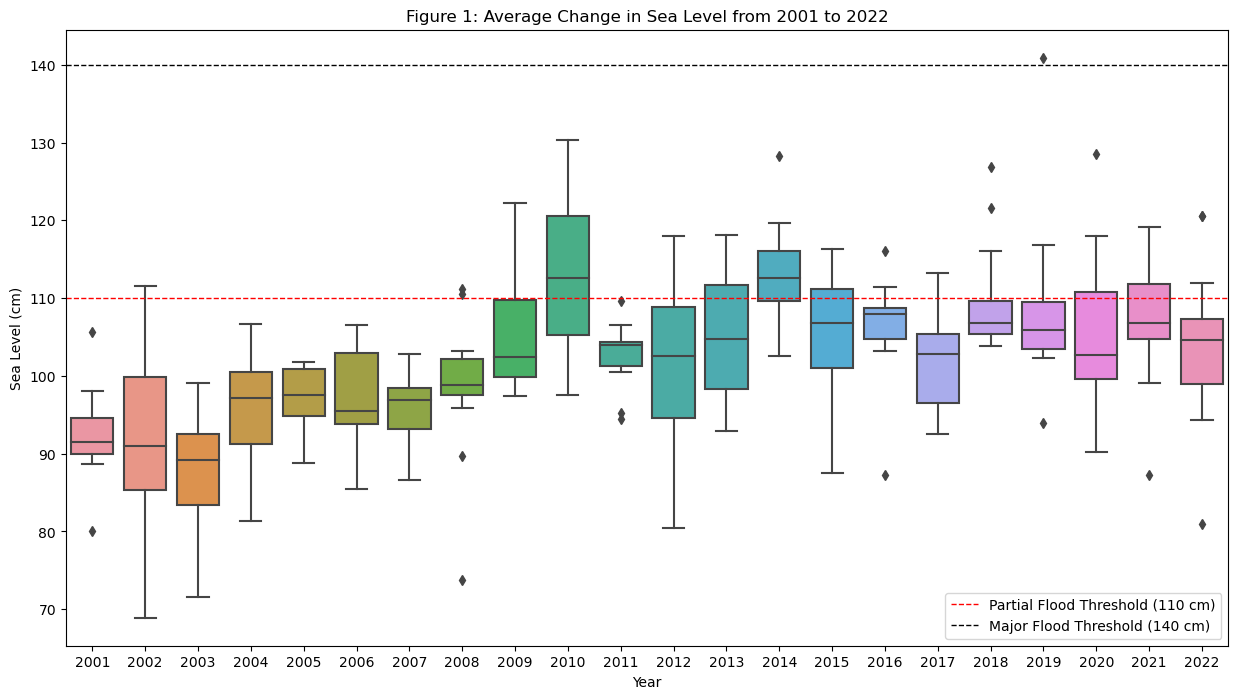

In [66]:
generate_yearly_box_plots(df, "Date", "Sea Level (cm)", "Average Change in Sea Level from 2001 to 2022", True)

In [67]:
years = range(2001, 2023)
yearly_average_sea_level = []

for year in years:
    yearly_average_level = df[df["Date"].dt.year == year]["Sea Level (cm)"].mean()
    yearly_average_sea_level.append(yearly_average_level)

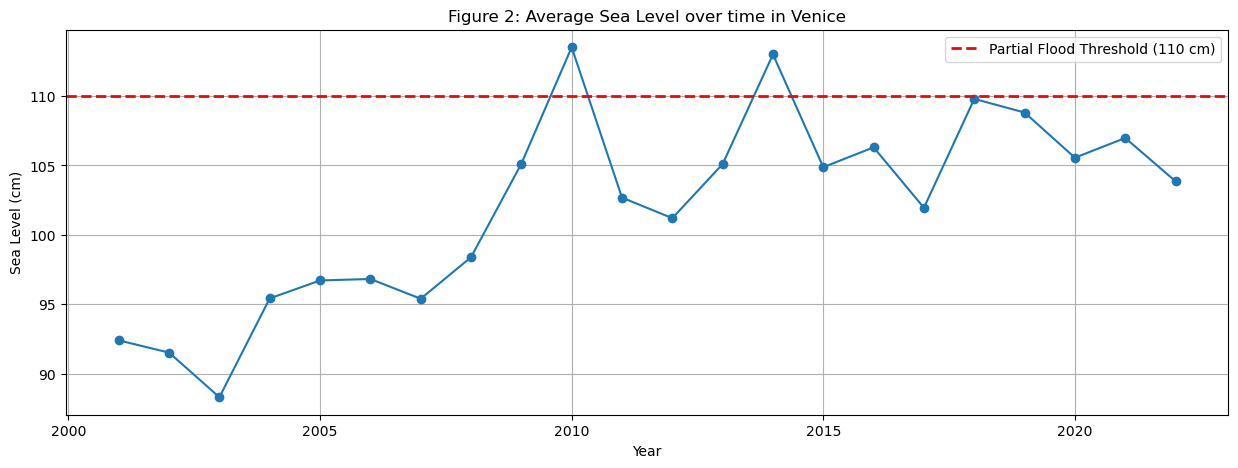

In [68]:
plt.figure(figsize=(15, 5))
plt.plot(years, yearly_average_sea_level, marker="o", linestyle="-")

plt.xlabel("Year")
plt.ylabel("Sea Level (cm)")
plt.title(f"Figure {get_figure_number()}: Average Sea Level over time in Venice")
plt.grid(True)
# When sea level exceeds 110cm Venice floods -> Adds threshold line
plt.axhline(y=110, color="red", linewidth=2, linestyle="--", label="Partial Flood Threshold (110 cm)")
plt.legend()

plt.show()

It seems that over time the sea levels have greatly increased from 2001 to 2022, this is understandable due to global warming.

In [69]:
def get_average_sea_level_by_month(month, year):
    df_year_month = df[(df["Year"] == year) & (df["Month"] == month)]
    monthly_average_level = df_year_month["Sea Level (cm)"].mean()

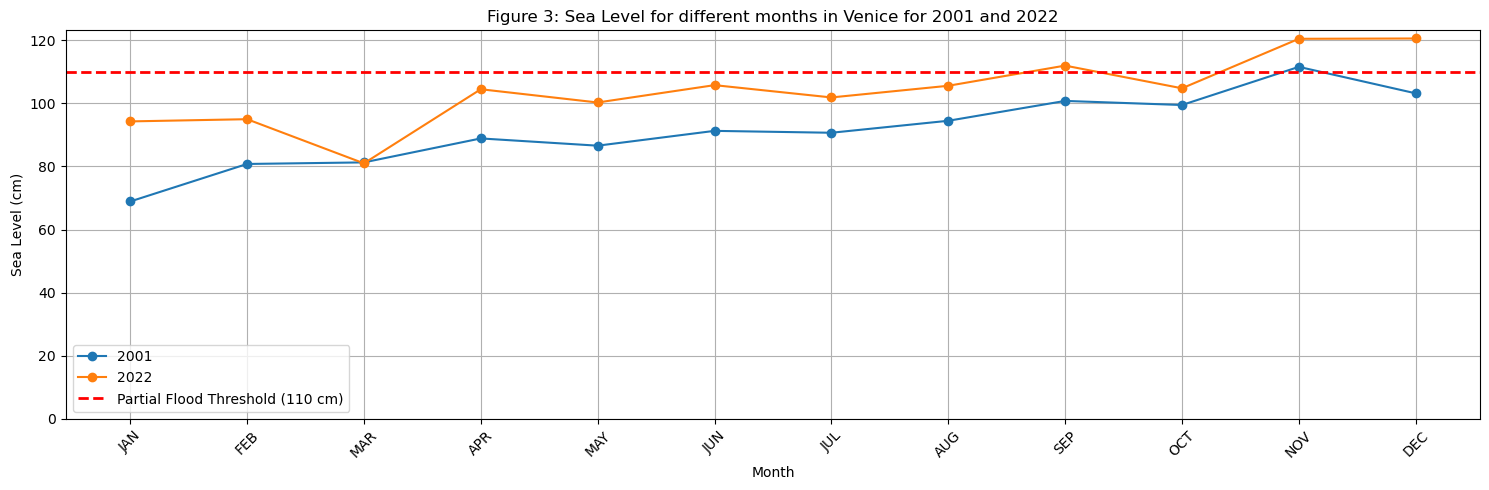

In [70]:
months = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
sea_levels = []

def get_average_sea_level_by_month(month, year, df):
    df_year_month = df[(df["Date"].dt.year == year) & (df["Date"].dt.month == month)]
    return df_year_month["Sea Level (cm)"].mean()

for year in [2002, 2022]:
    yearly_sea_levels = []
    for month in range(1, 13):  # Iterate through months from 1 to 12
        monthly_sea_level = get_average_sea_level_by_month(month, year, df)
        yearly_sea_levels.append(monthly_sea_level)
    
    sea_levels.append(yearly_sea_levels)
        
plt.figure(figsize=(15, 5))
plt.plot(months, sea_levels[0], marker="o", linestyle="-", label="2001")
plt.plot(months, sea_levels[1], marker="o", linestyle="-", label="2022")

plt.xlabel("Month")
plt.ylabel("Sea Level (cm)")
plt.title(f"Figure {get_figure_number()}: Sea Level for different months in Venice for 2001 and 2022")
plt.grid(True)

# When sea level exceeds 110cm Venice floods -> Adds threshold line
plt.axhline(y=110, color="red", linewidth=2, linestyle="--", label="Partial Flood Threshold (110 cm)")
plt.legend()
plt.xticks(rotation=45)
plt.ylim(ymin=0) # Start y-axis from 0
plt.tight_layout()

plt.show()

This graph shows that the sea level has increased in 2022 compared to 2001.

The important takeaway is that unlike the other graphs, this one shows the change in the sea level over the various months of the year. It seems that the sea level is highest in the late fall and early winter months (November, December and January), this matches the information I found through my Domain Understanding.

In [71]:
# Flood Situations (over 100 cm)
flood_sea_levels = []
flood_months = []
flood_years = []

for date, sea_level in zip(df["Date"], df["Sea Level (cm)"]):
    if sea_level > 100:
        year = date.year
        month = date.month
        
        flood_sea_levels.append(sea_level)
        flood_months.append(month)
        flood_years.append(year)

max_sea_level = max(flood_sea_levels)
max_index = flood_sea_levels.index(max_sea_level)

max_month = flood_months[max_index]
max_year = flood_years[max_index]

# Print the maximum sea level and associated information
print(f"The maximum sea level over 100 cm is {max_sea_level} cm.")
print(f"{max_year} / {max_month}.")

The maximum sea level over 100 cm is 140.9 cm.
2019 / 11.


In the dataset of sea level data from 2001 to 2022, the highest point for the average sea level per month is during Novemeber 2019, I checked this online to confirm that it was correct, I found out that in 2019 there was a major flood in Venice, in which 80% of the city was underwater.

Link to news: https://www.theweathernetwork.com/en/news/weather/severe/this-day-in-weather-history-november-12-2019-venice-flooding

## Change in **Tide Levels** over time

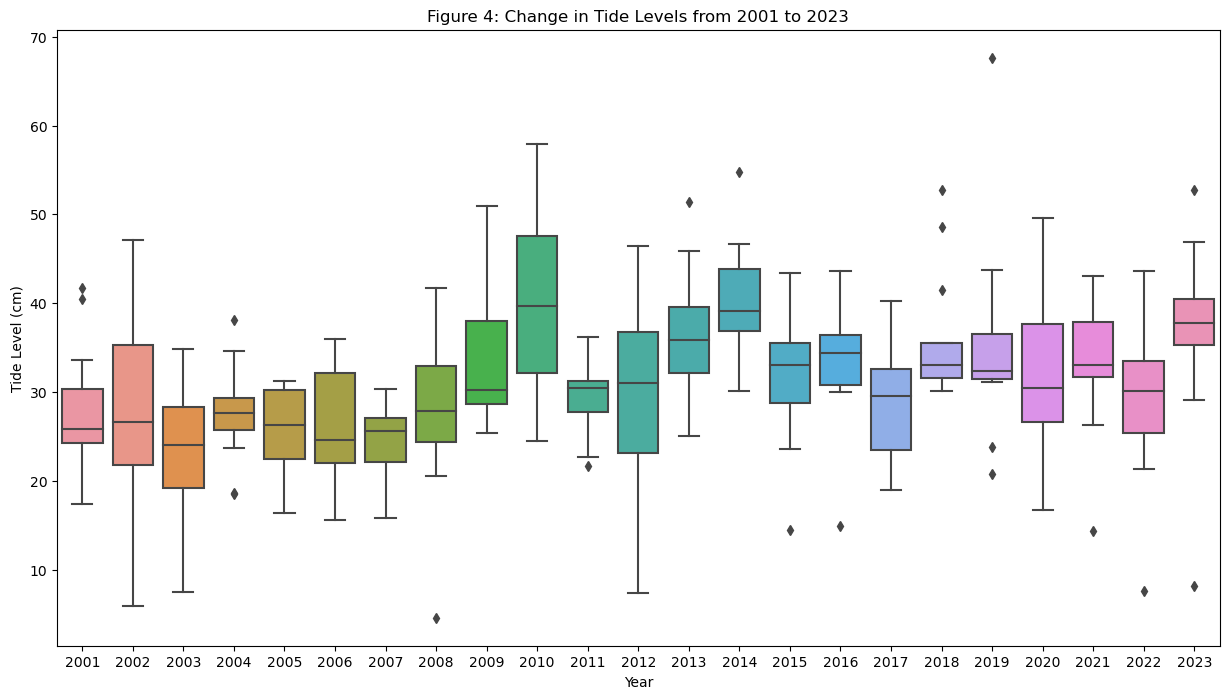

In [72]:
generate_yearly_box_plots(df_tide_level_averages, "Date", "Tide Level (cm)", "Change in Tide Levels from 2001 to 2023", False)

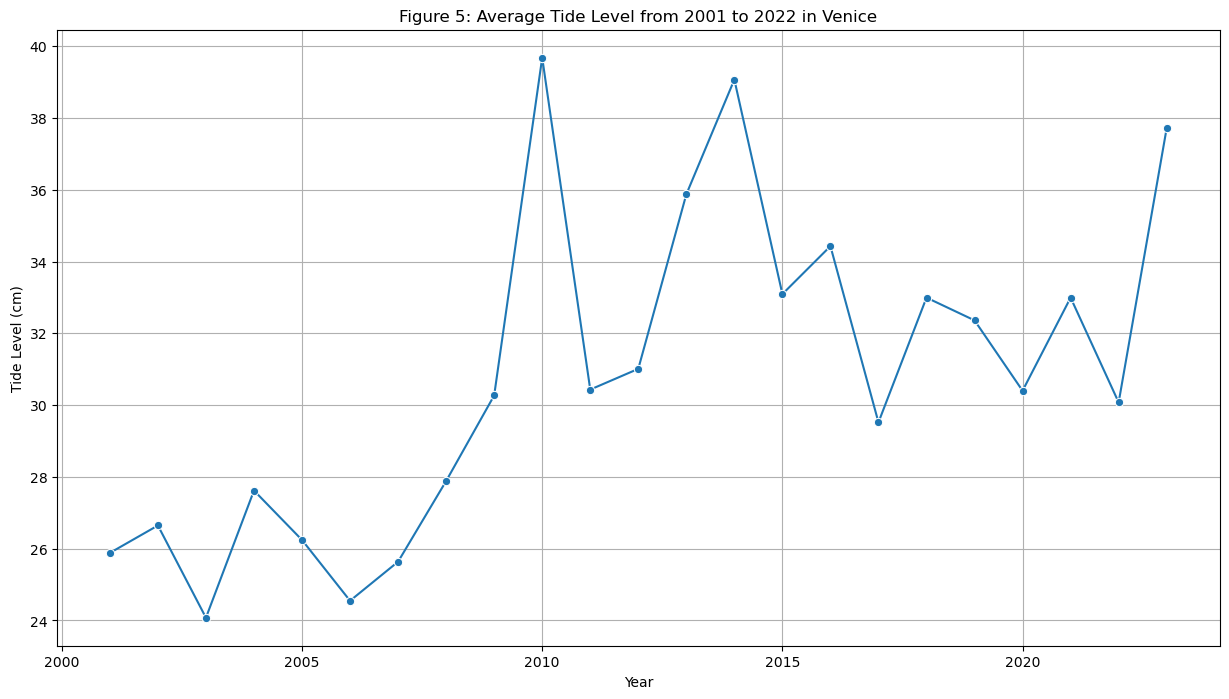

In [73]:
generate_yearly_line_plot(df_tide_level_averages, "Date", "Tide Level (cm)", "Average Tide Level from 2001 to 2022 in Venice", False, False)

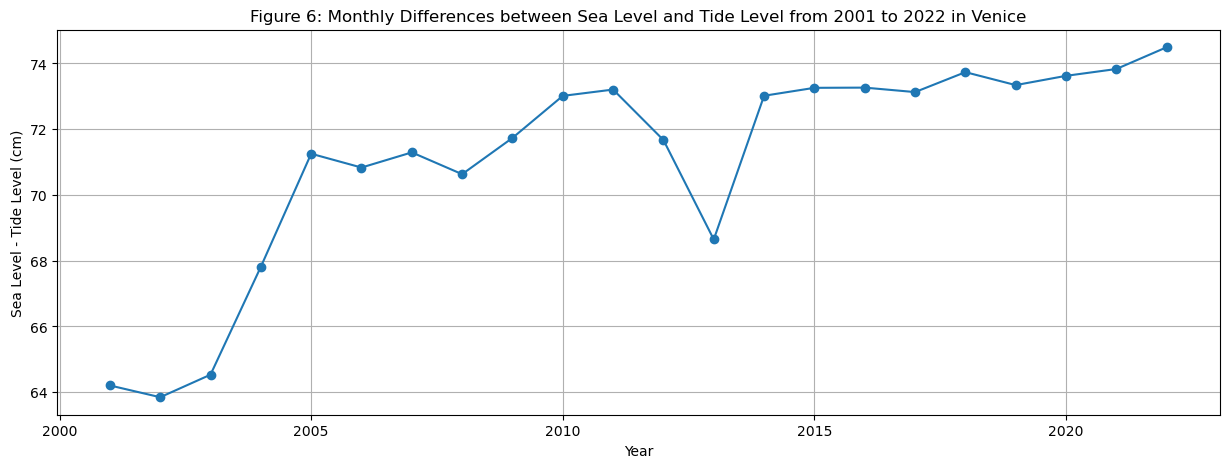

In [74]:
yearly_average_tide_level = []

for year in years:
    yearly_average_level = df_tide_levels[df_tide_levels["DateTime"].dt.year == year]["Tide Level (cm)"].mean()
    yearly_average_tide_level.append(yearly_average_level)

sea_tide_level_differences = []

# Calculate difference between sea level and tide level
for sea_level, tide_level in zip(yearly_average_sea_level, yearly_average_tide_level):
    difference = sea_level - tide_level
    sea_tide_level_differences.append(difference)

plt.figure(figsize=(15, 5))

plt.plot(years, sea_tide_level_differences, marker="o", linestyle="-")

plt.xlabel("Year")
plt.ylabel("Sea Level - Tide Level (cm)")
plt.title(f"Figure {get_figure_number()}: Monthly Differences between Sea Level and Tide Level from 2001 to 2022 in Venice")
plt.grid(True)

plt.show()

## Correlation Matrix of **Different Variables**

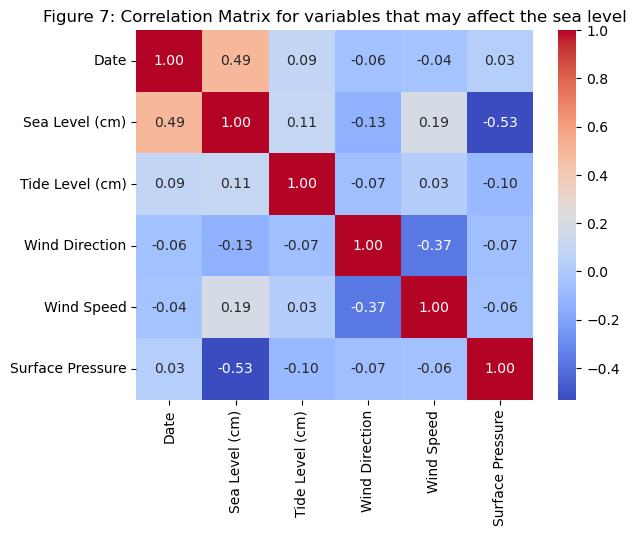

In [75]:
df_temperature_converted = convert_nasa_to_prophet_format(df_temperature, "T2M", "Temperature")
df_wind_direction_converted = convert_nasa_to_prophet_format(df_wind_direction, "WD10M", "Wind Direction")
df_wind_speed_converted = convert_nasa_to_prophet_format(df_wind_pressure, "WS2M", "Wind Speed")
df_surface_pressure_converted = convert_nasa_to_prophet_format(df_surface_pressure, "PS", "Surface Pressure")

df_tide_levels_renamed = df_tide_levels.rename(columns={"DateTime": "Date"})
df_wind_direction_renamed = df_wind_direction_converted.rename(columns={"ds": "Date"})
df_wind_speed_renamed = df_wind_speed_converted.rename(columns={"ds": "Date"})
df_surface_pressure_renamed = df_surface_pressure_converted.rename(columns={"ds": "Date"})

combined_df = pd.merge(df, df_tide_levels_renamed, on="Date")
combined_df = pd.merge(combined_df, df_wind_direction_renamed, on="Date")
combined_df = pd.merge(combined_df, df_wind_speed_renamed, on="Date")
combined_df = pd.merge(combined_df, df_surface_pressure_renamed, on="Date")

correlation_matrix = combined_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title(f"Figure {get_figure_number()}: Correlation Matrix for variables that may affect the sea level")
plt.show()

#### Conclusion:
This conclusion is used to assess how the different variable correlate with the sea level:
- The surface pressure has a very negative correlation with the sea level, this indicates that this would be a bad variable to include in the model.
- The wind speed has a weak, yet positive correlation. This may lead to some minor improvements in the accuracy of the model.
- The wind direction has a weak and negative correlation, perhaps this would also lead to a fall in accuracy.
- The tide level has a weak positive correlation. This should also lead to an improvement of the accuracy of the model.
- The date has a quite strong postive correlation. This means that the sea level closely depends on the time of year.

There are just some observations using the correlation matrix, it is important to understand why these correlations may or may not exist. As well as performing multiple attempts on the model with various datasets being added as regressors.

Previously, I had also included the temperature in this correlation matrix, however, I have removed it as it indicated an almost inexistent correlation (0.03). The reason for this is due to the correlation matrix calculating the mean values for each of the years, in this way the correlations are calculated throughout the years, hence not showing any correlation.

Below, I have included a solution for this.

## Change and Correlation of **Temperature** over time periods

The code below is used to fix the previous problem with the correlation matrix. It is made to vectorize the original temperature DataFrame, so it vectorizes each of the years and months, while leaving the average temperature corresponding to that specific month.

This is used to create a matrix to compare the correlation of the temperature on a basis of every month and year.

In [76]:
temperatures_date_converted = []
month_numbers = range(1, 13)

def vectorize_year(year):
    vector = [0] * (len(years) - 1)
    index = years.index(year)
    
    vector.insert(index, 1)
    return vector

def vectorize_month(month):
    vector = [0] * 11
    index = month_numbers.index(month)
    
    vector.insert(index, 1) # 12 months
    return vector
    
for date, temperature in zip(df_temperature_converted["ds"], df_temperature_converted["Temperature"]):
    year = date.year
    month = date.month
    
    temperatures_date_converted.append(vectorize_year(year) + vectorize_month(month) + [temperature])
    
    
columns = ["2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", 
           "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", 
           "2021", "2022", 
           "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC", 
           "Temperature"]

    
df_temperature_date_converted = pd.DataFrame(temperatures_date_converted, columns=columns)
df_temperature_date_converted.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Temperature
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.53
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.40
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10.76
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,12.57
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,19.53


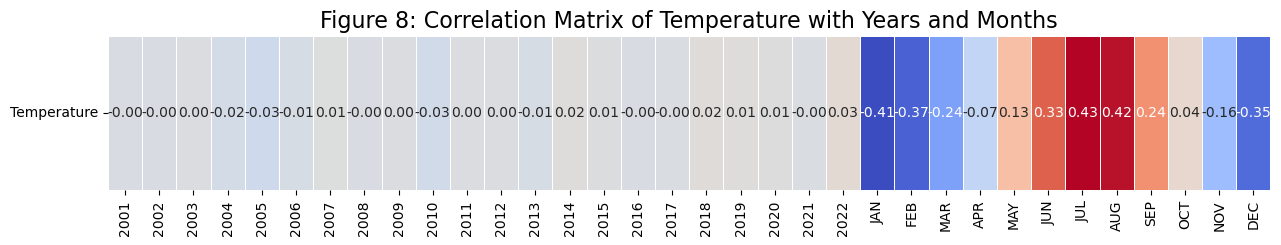

In [77]:
corr_matrix = df_temperature_date_converted.corr()

# Extract only the correlations with Temperature
temperature_corr = corr_matrix["Temperature"].drop("Temperature")

plt.figure(figsize=(15, 2))

temperature_corr_df = temperature_corr.to_frame().T

sns.heatmap(temperature_corr_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, linewidths=0.5)

plt.title(f"Figure {get_figure_number()}: Correlation Matrix of Temperature with Years and Months", fontsize=16)
plt.yticks(rotation=0)
plt.show()

The correlation matrix below shows an almost inexistand correlation with the year, however there seems to be some correlation with the months. I look more in depth to this part in the correlation matrix below.

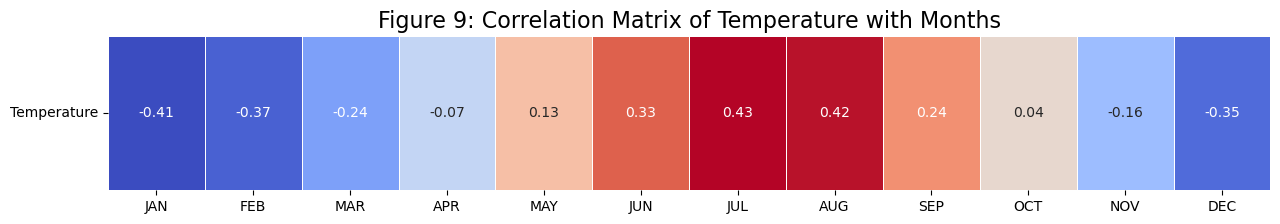

In [78]:
corr_matrix = df_temperature_date_converted.corr()

# Extract only the correlations with Temperature for the months
temperature_corr = corr_matrix.loc[months, "Temperature"]

plt.figure(figsize=(15, 2))

temperature_corr_df = temperature_corr.to_frame().T

sns.heatmap(temperature_corr_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=False, linewidths=0.5)

plt.title(f"Figure {get_figure_number()}: Correlation Matrix of Temperature with Months", fontsize=16)
plt.yticks(rotation=0)
plt.show()

It seems that the winter months generally have a negative correlation with the temperature, this makes sense, as the temperature is colder in the winter. It also shows a particularly strong correlation in July and August, which I think is due to the same reason. This all makes sense.

From this point, it would also be interesting to see how the change in temperature per month could influence the sea level:

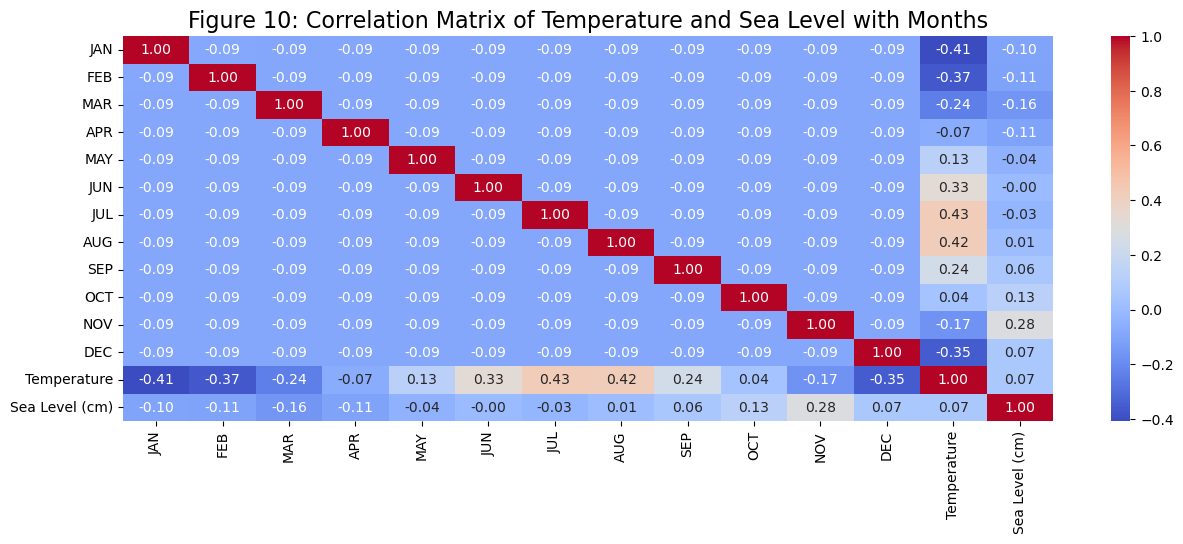

In [79]:
 # Exclude the first 2 rows
# This is because the temperature data starts in Jan 2001, whereas the sea level data starts in Mar 2001
df_temperature_sea_date_converted = df_temperature_date_converted.iloc[2:].copy()
df_temperature_sea_date_converted = df_temperature_sea_date_converted.drop(columns=[str(year) for year in range(2001, 2023)])
df_temperature_sea_date_converted["Sea Level (cm)"] = df["Sea Level (cm)"].values

plt.figure(figsize=(15, 5))

correlation_matrix = df_temperature_sea_date_converted.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, 
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

plt.title(f"Figure {get_figure_number()}: Correlation Matrix of Temperature and Sea Level with Months", fontsize=16)
plt.yticks(rotation=0)
plt.show()

It seems that the temperature and sea levels on their own have a weak negative correlation, this could mean that there may be a weak inverse relationship between the two variables.

Also, the sea level seems to have weak positive correlation from December to May, and weak negative correlation ranging from June to November. From my domain understanding, I know that the sea level is particularly high in the months of November and December, however this does not seem to be strongly correlated on the confusion matrix.

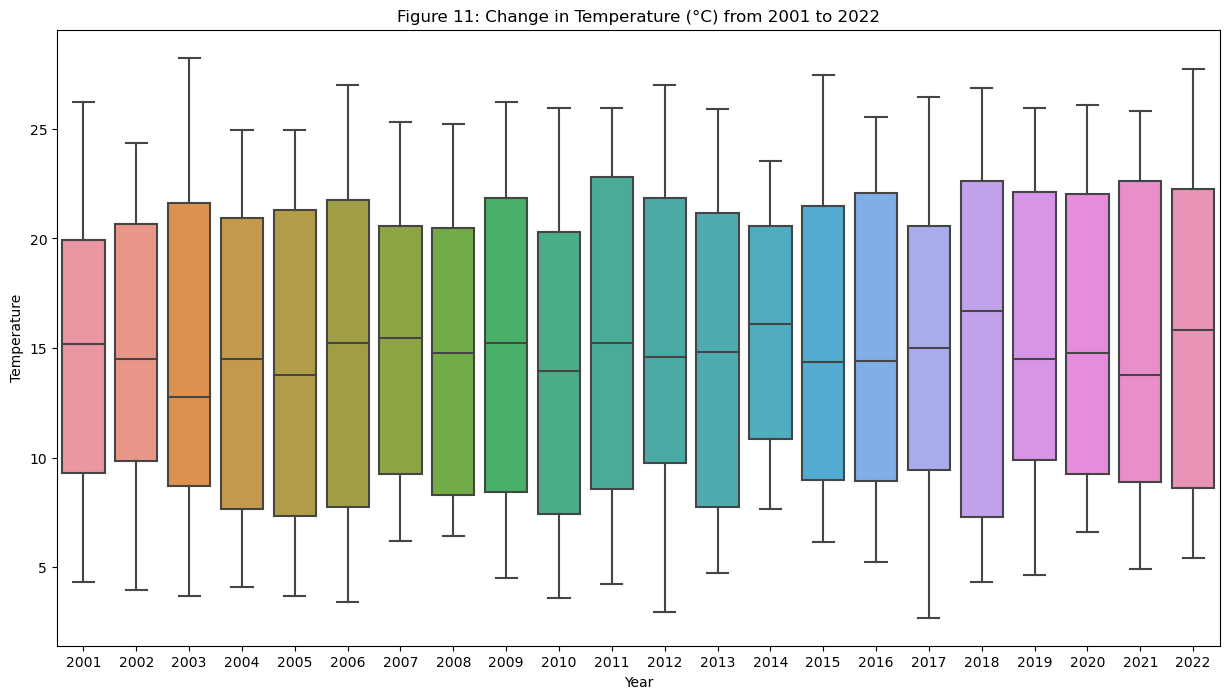

In [80]:
generate_yearly_box_plots(df_temperature_converted, "ds", "Temperature", "Change in Temperature (°C) from 2001 to 2022", False)

The median, highest, lower and the quartlies generally do not vary very much over time. This indicates that in approximately 20 years, there have not been such significant changes in the temperature.

In [81]:
parameter = "T2M"

def get_monthly_temperature_averages(years):
    monthly_temperature_averages = []
    
    for year in years:
        year_temperature_averages = []

        for month in months:
            average_monthly_temperature = df_temperature[(df_temperature["PARAMETER"] == parameter) & (df_temperature["YEAR"] == year)][month].mean()
            year_temperature_averages.append(average_monthly_temperature)
        monthly_temperature_averages.append(year_temperature_averages)
        
    return monthly_temperature_averages

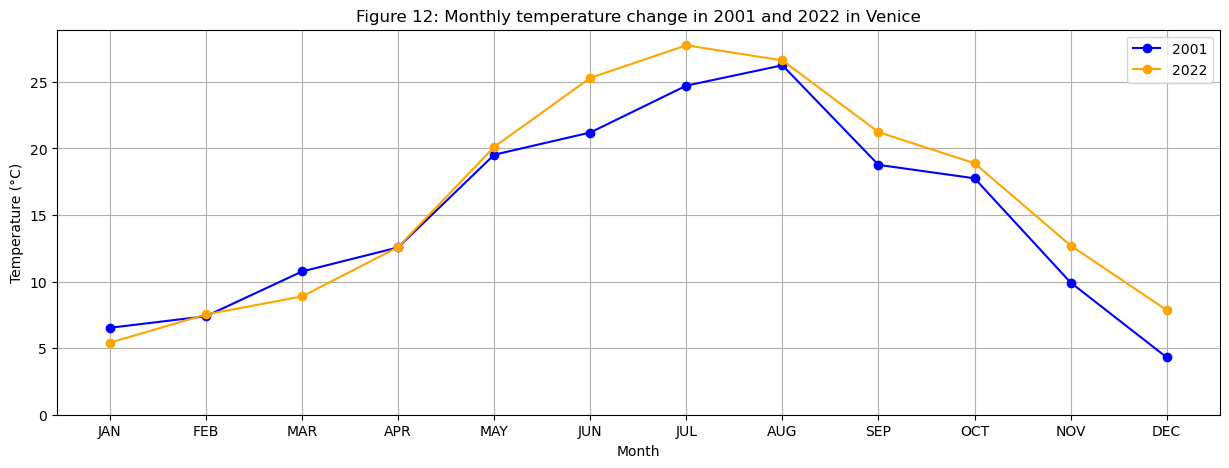

In [82]:
monthly_temperature_averages = get_monthly_temperature_averages([2001, 2022])

plt.figure(figsize=(15, 5))

plt.plot(months, monthly_temperature_averages[0], marker="o", linestyle="-", color="blue", label="2001")
plt.plot(months, monthly_temperature_averages[1], marker="o", linestyle="-", color="orange", label="2022")

plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title(f"Figure {get_figure_number()}: Monthly temperature change in 2001 and 2022 in Venice")
plt.grid(True)
plt.ylim(ymin=0) # Start y-axis from 0
plt.legend()

plt.show()

It seems that in most months the temperature increased from 2001 to 2022, particularly during the months of summer. This makes sense due to Global Warming, also there seems to be a link here, as there was the same effect for the rise in the sea level.

Given that the temperature data varies with season factors and over time, this could be a useful feature to include in the time series model.

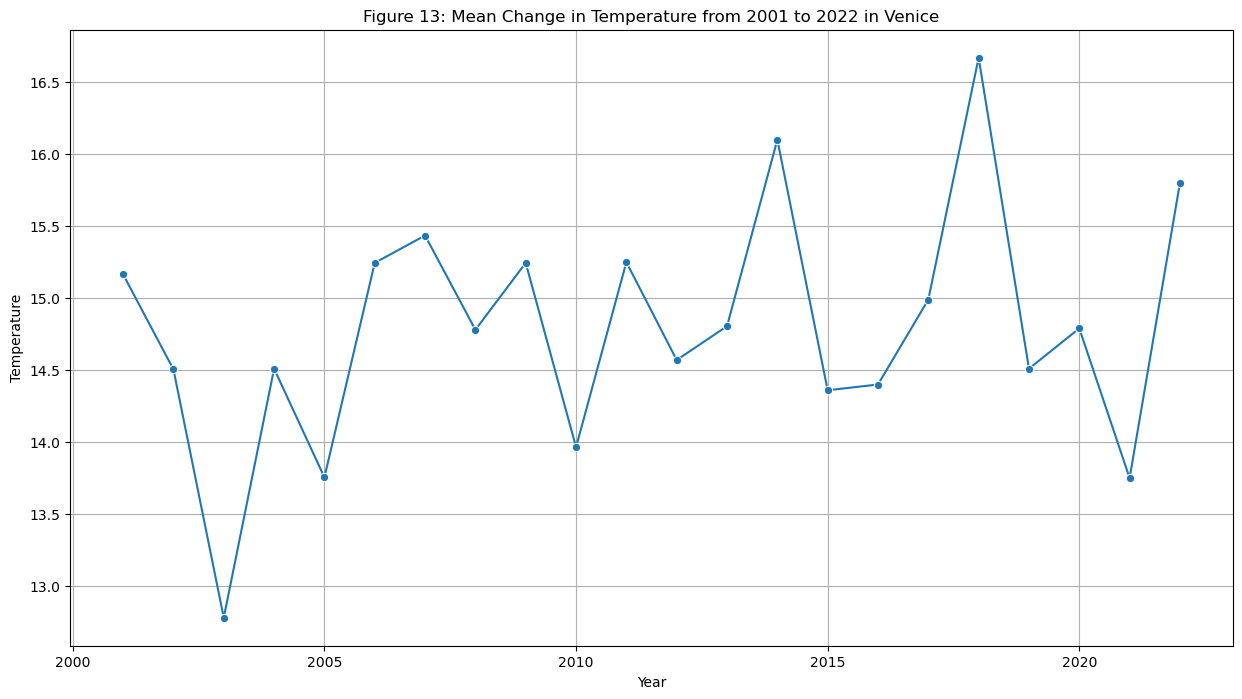

In [83]:
generate_yearly_line_plot(df_temperature_converted, "ds", "Temperature", "Mean Change in Temperature from 2001 to 2022 in Venice", False, False)

The temperature really varies over the years, it does not follow a particular trend, but it is also important to consider that this is the average temperature for a full year.

## Change in **Wind Speed** over time

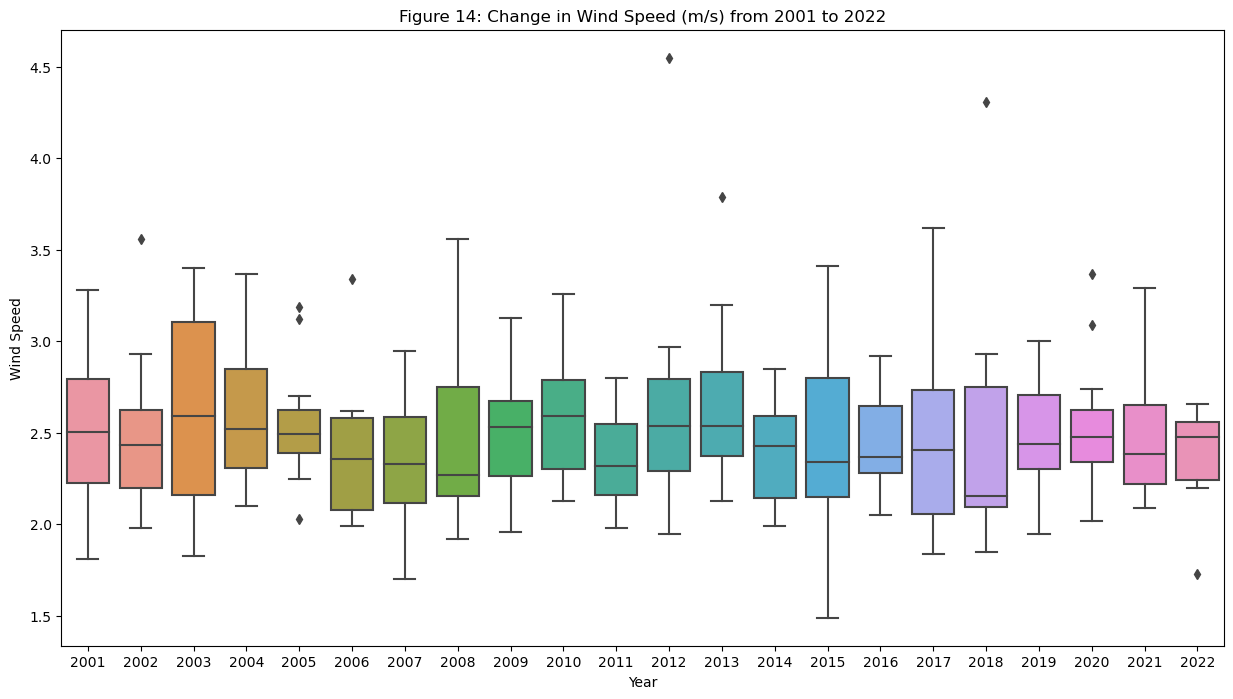

In [84]:
generate_yearly_box_plots(df_wind_speed_converted, "ds", "Wind Speed", "Change in Wind Speed (m/s) from 2001 to 2022", False)

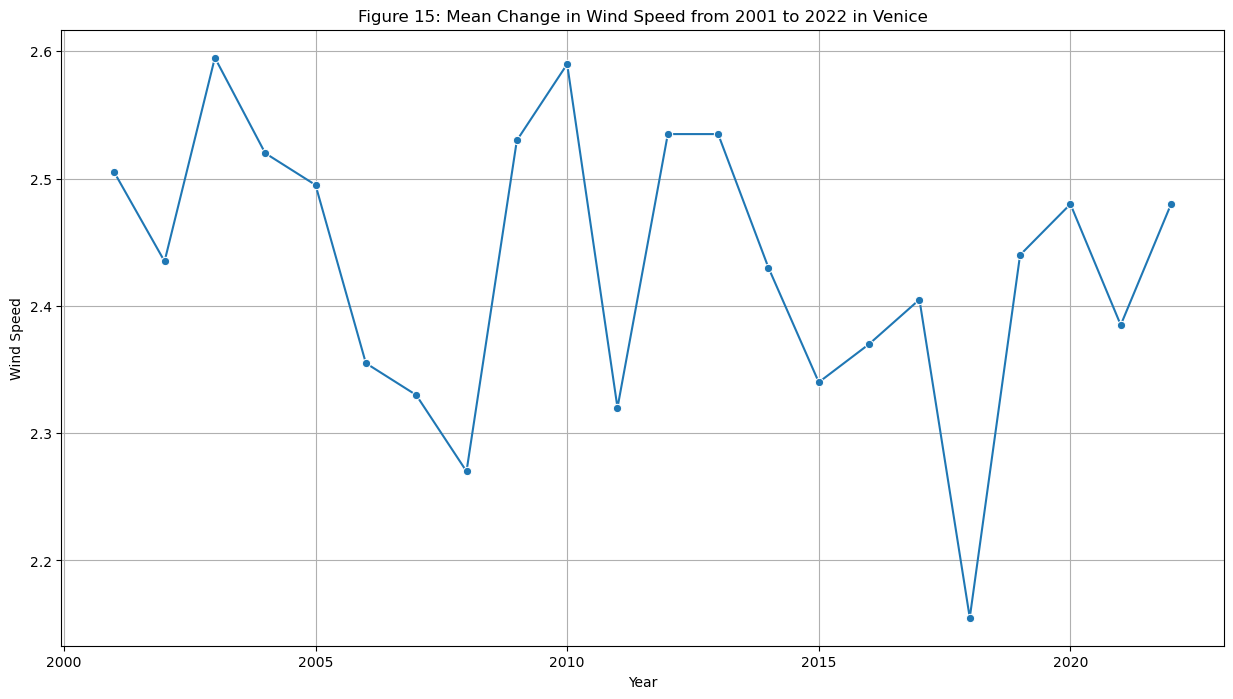

In [85]:
generate_yearly_line_plot(df_wind_speed_converted, "ds", "Wind Speed", "Mean Change in Wind Speed from 2001 to 2022 in Venice", False, False)

The average wind speed really varies throughout the years. This was particularly high in 2003 and 2010, whereas it was particularly low in 2008 and 2018. This is quite unusual, as in 2011 and 2019 there were some major floods in Venice, however, in 2010 the wind speed was very high, and in 2018 it was really low.

However, it is also important to consider that this is a yearly average, so this may have actually changed a lot throughout the year.

## Change in **Wind Direction** over time

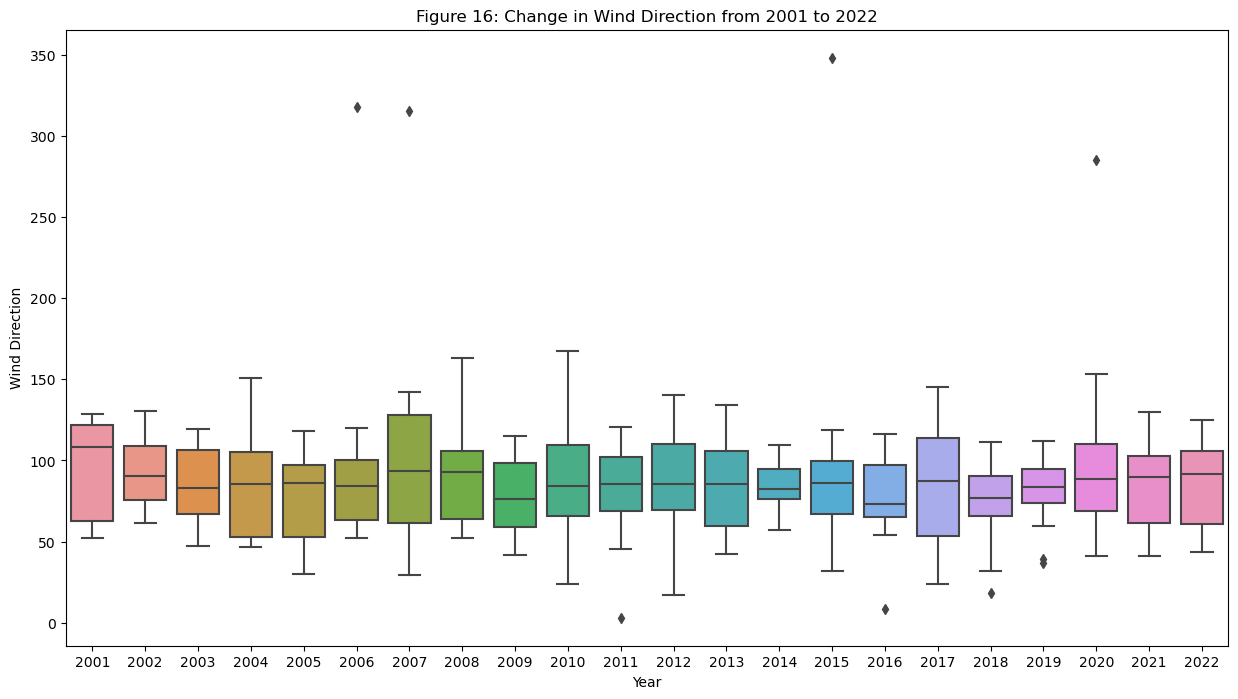

In [86]:
generate_yearly_box_plots(df_wind_direction_converted, "ds", "Wind Direction", "Change in Wind Direction from 2001 to 2022", False)

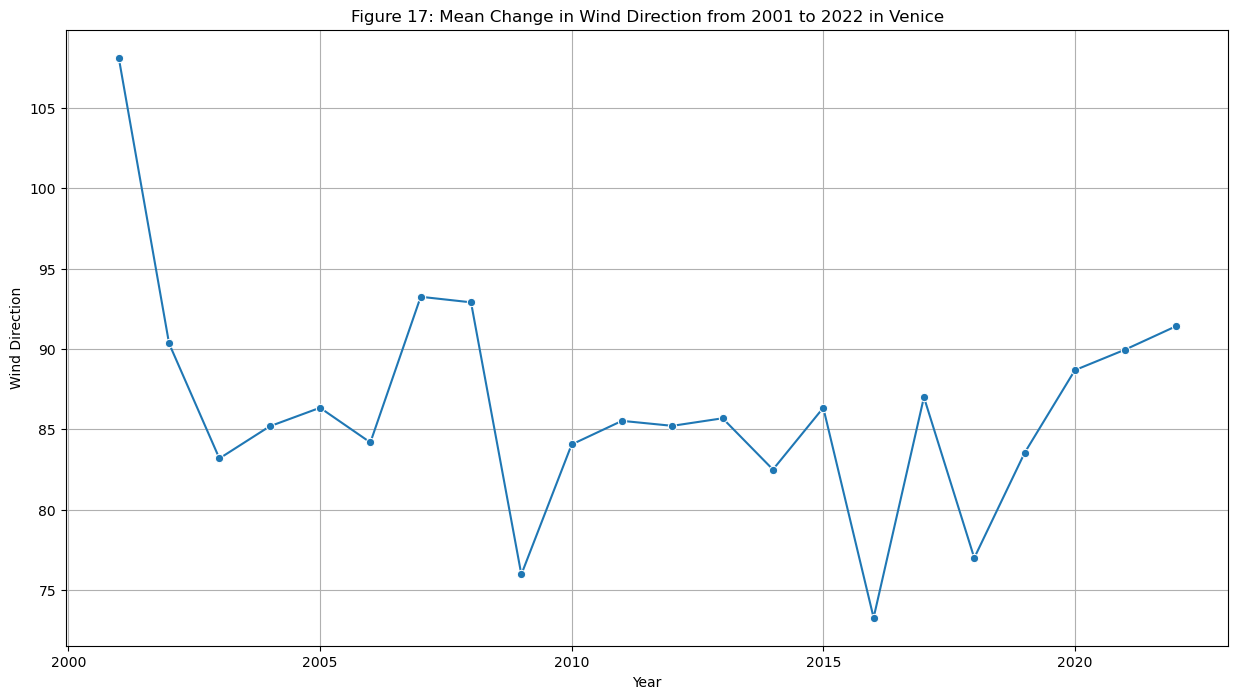

In [87]:
generate_yearly_line_plot(df_wind_direction_converted, "ds", "Wind Direction", "Mean Change in Wind Direction from 2001 to 2022 in Venice", False, False)

The wind direction does not seem to vary so greatly throughout the years, however, I did notice that some of the years have some really extreme outliers. This is also probably due to this being a yearly average which does not show all of the meaning of this data.

## Change in **Surface Pressure** over time

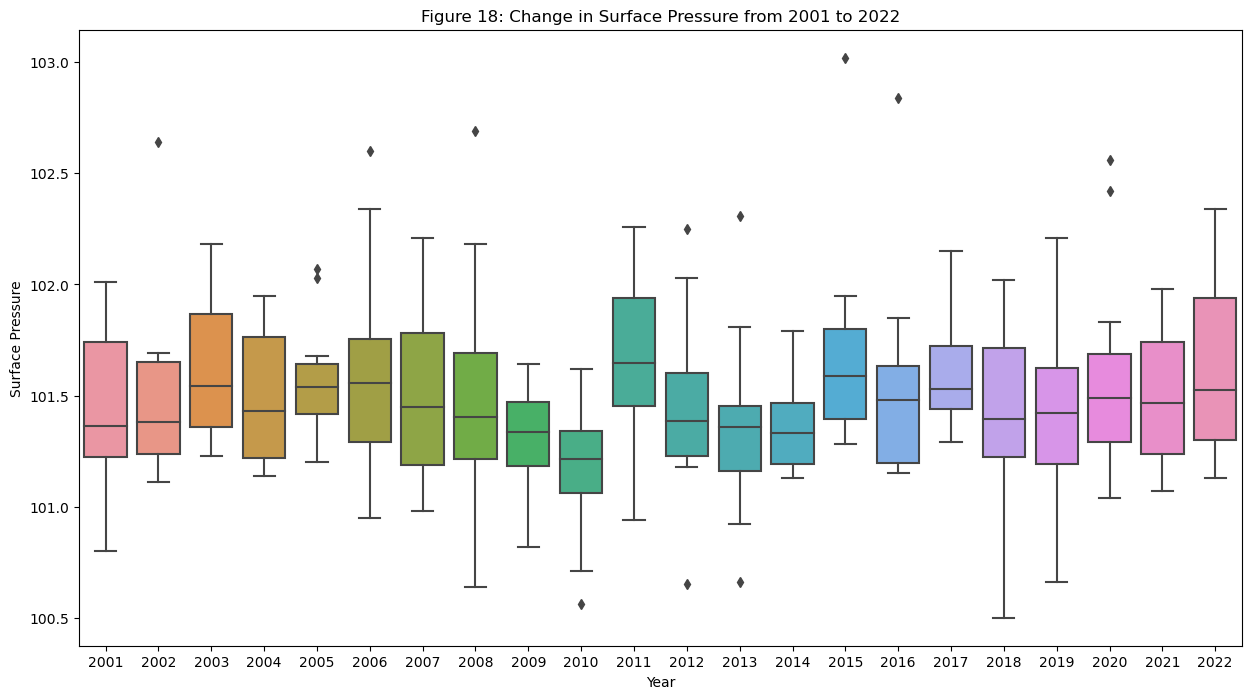

In [88]:
generate_yearly_box_plots(df_surface_pressure_converted, "ds", "Surface Pressure", "Change in Surface Pressure from 2001 to 2022", False)

The surface pressure throughout a year tends to vary quite a lot. The lowest surface pressure can be seen in 2018 and 2019, this is interesting as 2019 was a year with major flooding. A low air pressure leads to high tides, resulting in flooding. Given that air pressure and surface pressure are related, it is possible that this would also be a good feature to include in the model.

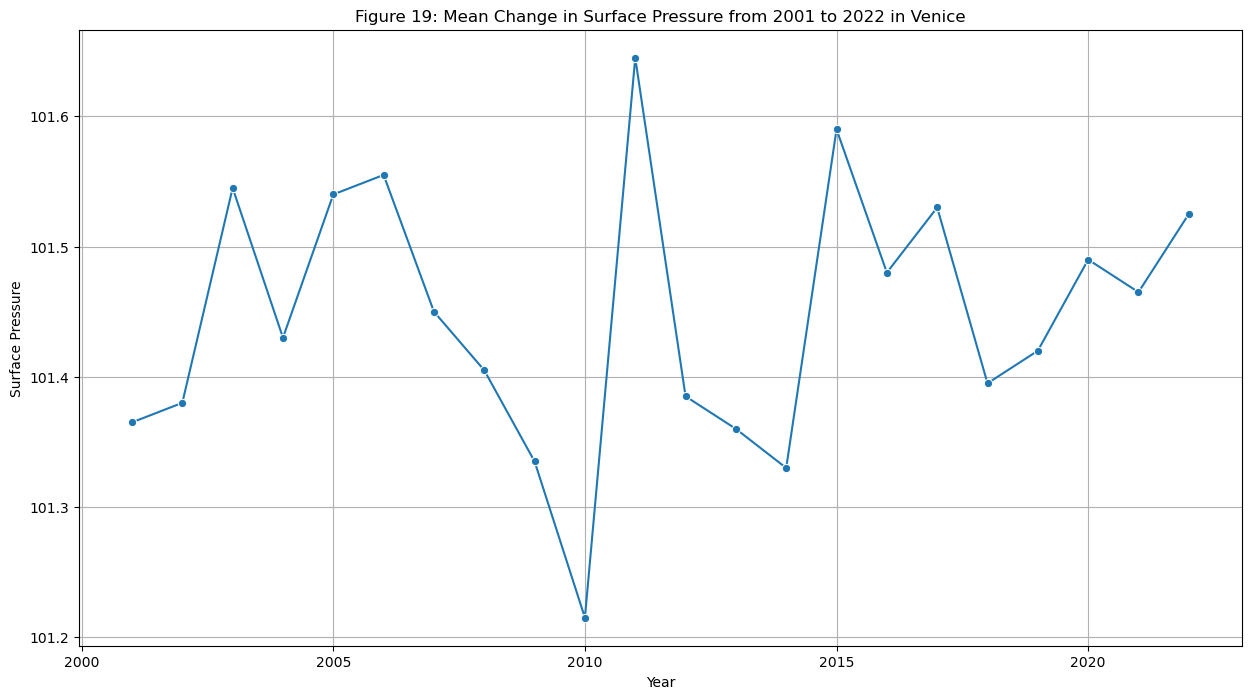

In [89]:
generate_yearly_line_plot(df_surface_pressure_converted, "ds", "Surface Pressure", "Mean Change in Surface Pressure from 2001 to 2022 in Venice", False, False)

This graph also illustrates the variability of the surface pressure. There was a significant surge in 2011, this was also the year of a major flood. However, in 2019 there is just a minor surge, while there still was a quite significant flood during that year.